Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



Create a dataframe named "data" from the given datafile and print it's head

In [47]:
data=pd.read_csv(r'C:\Users\vaish\Downloads\datasets_insurance.csv',header=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [48]:
print(data.dtypes)
print(data.shape)
print(data.describe())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
(1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Check if there are missing values. If yes, handle them.

In [49]:
data.isna().sum()  # costs can be different in different region hence region is imp

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [50]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

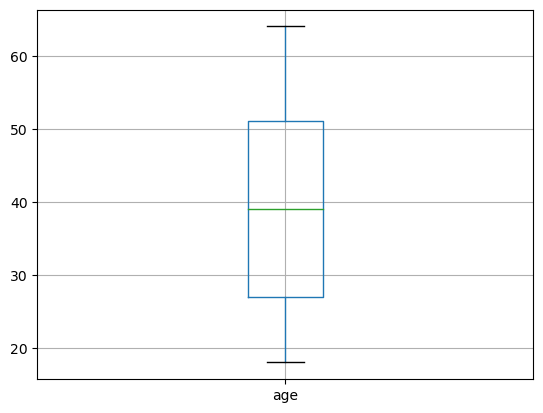

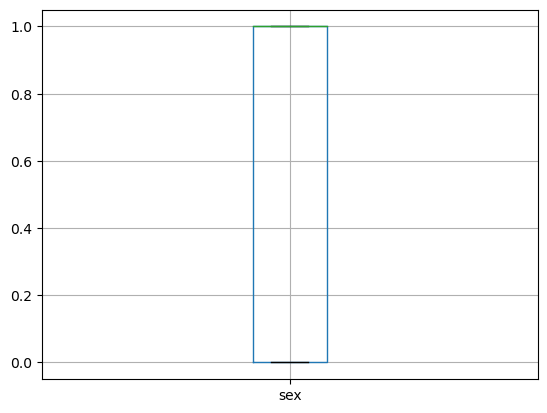

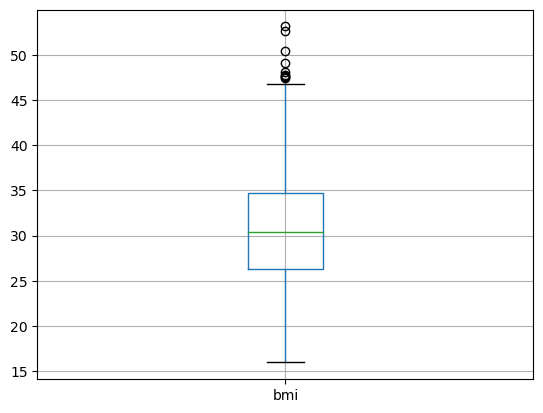

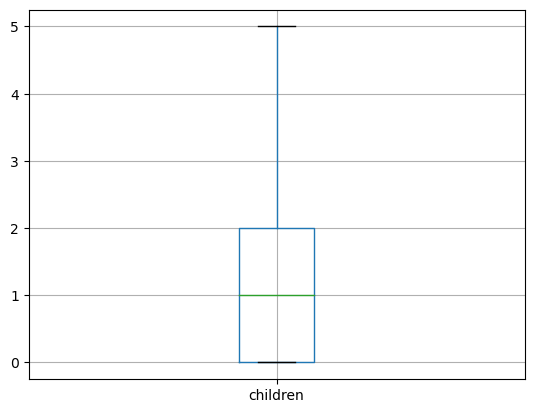

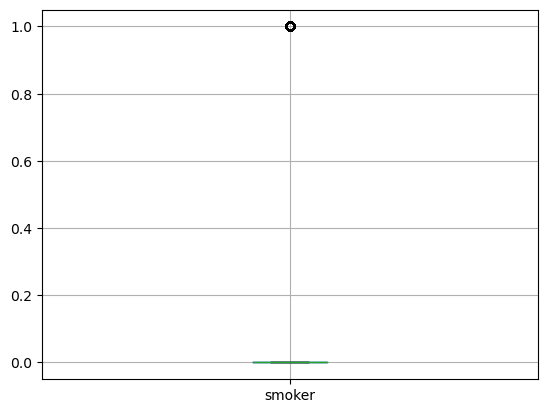

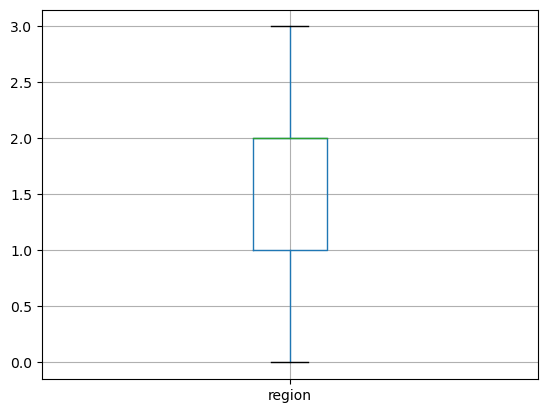

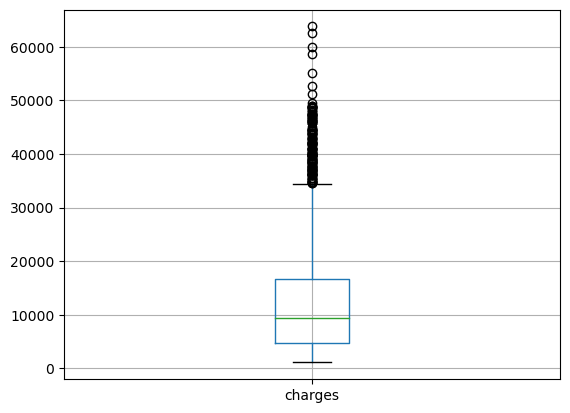

In [92]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

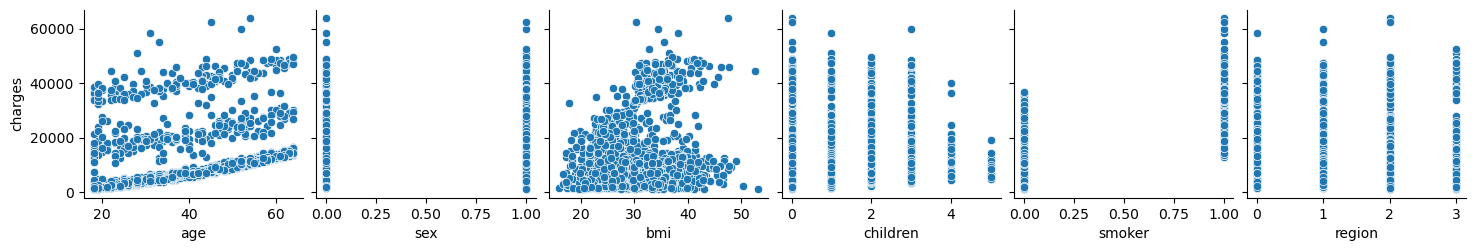

In [94]:
sns.pairplot(data,x_vars=['age','sex', 'bmi', 'children', 'smoker', 'region'],y_vars=['charges'],kind='scatter')
plt.show()

Create X and Y

In [52]:
X=data.loc[:,['age','sex', 'bmi', 'children', 'smoker', 'region']]
Y=data.loc[:,'charges']

In [53]:
print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

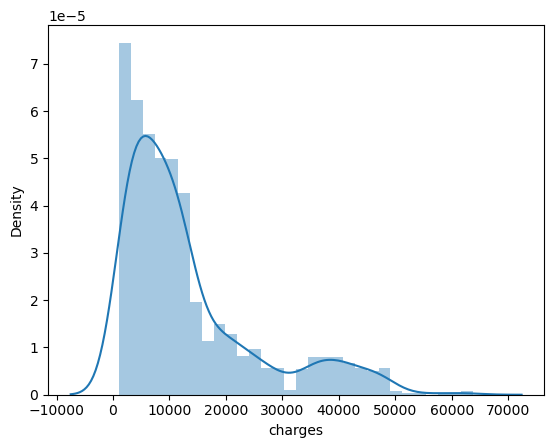

In [54]:
sns.distplot(Y)
plt.show()

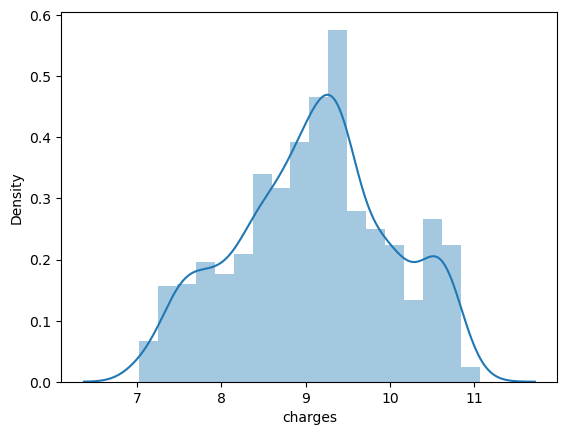

In [55]:
import numpy as np
Y_log=np.log(Y)
sns.distplot(Y_log)
plt.show()

In [ ]:
it is log level model

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3<br><br>
Hint: df.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [56]:
data.sex.replace({"female":0,"male":1},inplace=True)
X['sex']=X.sex.map({''})

In [57]:
data.smoker.replace({"no":0,"yes":1},inplace=True)

In [58]:
data.region.replace({'northeast':0,'northwest':1,'southeast':2,'southwest':3}, inplace=True)

In [93]:
X=data.loc[:,['age','sex', 'bmi', 'children', 'smoker', 'region']]
Y=data.loc[:,'charges']

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

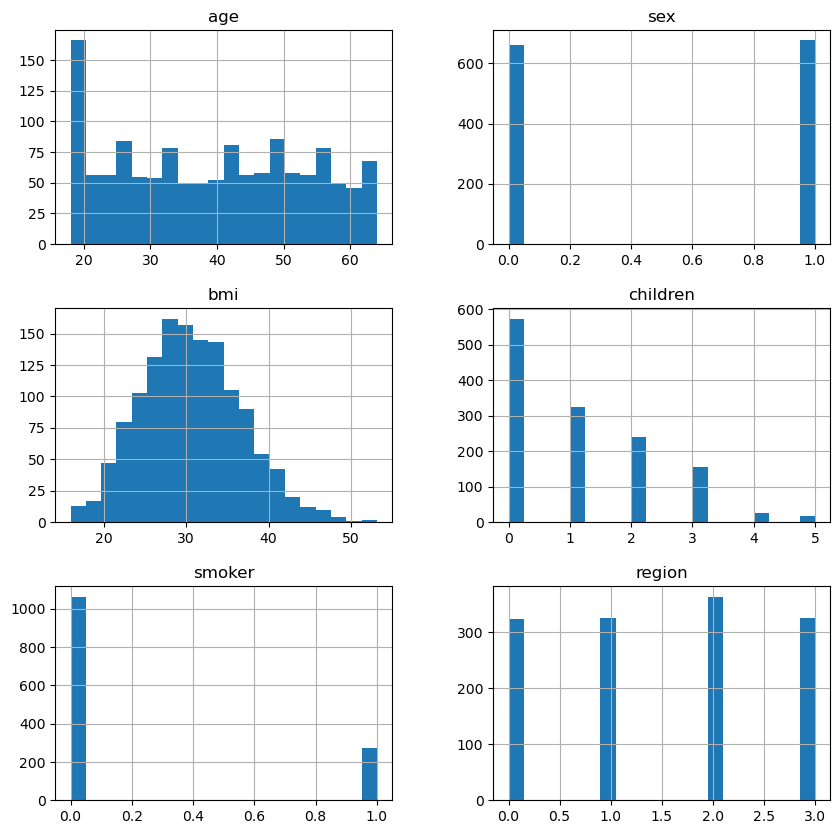

In [60]:
X.hist(bins=20,figsize=(10,10))
plt.show()

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


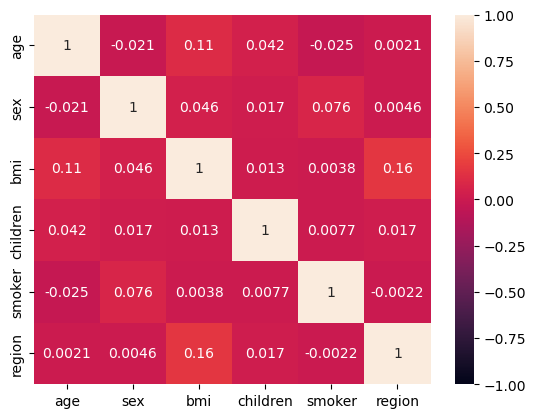

In [61]:
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [103]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2, 
                                                    random_state=10)  

Build a base Linear Regression model using sklearn.

In [104]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,Y_train)

print(lm.intercept_)
print()
print(lm.coef_)

6.998797622591985

[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [105]:
print(list(zip(X.columns,lm.coef_)))

[('age', 0.03498834149076491), ('sex', -0.0711322000534313), ('bmi', 0.012591262605123985), ('children', 0.09962976583044038), ('smoker', 1.569344301966667), ('region', -0.038891518199588526)]


Predict using the model.

In [106]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 8.90264566  8.55800249  9.44206862  9.37109228  8.30231857  8.93127398
  9.22860018  9.62770497  8.96169962 10.524292    8.12183109  8.270934
  8.75991467  9.14967223  9.23002002  9.36183759  8.32332991  9.81527793
  9.18395253 10.20908992 10.5308626   8.06726747  7.95992684  8.77128514
  8.43374205  9.41895434  9.01687327  9.41850025  8.42170066 10.20084299
  7.72507636 10.38861159  8.89576619  8.94511958  8.45447782  8.89057139
  9.43604078  9.09248396  9.09271164  8.89473802  9.58926813  9.15682789
  8.54484462  8.99761391  7.99767708  8.81979395  8.91337357 10.61798009
  9.30298176  9.24221911 10.01078002  8.31758485  8.90942155  9.62809789
  9.09900057  9.38167738  9.30538021  8.63050675  8.707771   10.70371838
  7.87802912 10.61635976 11.07322819  7.95757539  9.99650111  8.87336923
  8.47709653  8.90772216  8.86749958  8.92965431  8.81908517  7.95741791
  8.85051652  8.89426488  8.97913786  9.33234154  8.55732546  8.82884226
  7.81072893  9.33028012  9.26333526  9.18682528  9.7

Evaluate the model.

In [107]:
new_df=pd.DataFrame()
new_df=X_test.copy()  
 
new_df["Actual charges"]=Y_test
new_df["Predicted charges"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)
new_df

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
0,37,0,27.740,3,0,1,8.893093,8.902646
1,36,0,26.885,0,0,1,8.569372,8.558002
2,59,1,37.100,1,0,3,9.421182,9.442069
3,61,0,25.080,0,0,2,10.106963,9.371092
4,29,0,26.030,0,0,1,8.225895,8.302319
...,...,...,...,...,...,...,...,...
263,50,1,34.200,2,1,3,10.665620,10.759633
264,26,0,40.185,0,0,1,8.071295,8.375583
265,19,1,27.265,2,0,1,10.020989,8.096113
266,57,1,40.945,0,0,0,9.355851,9.437550


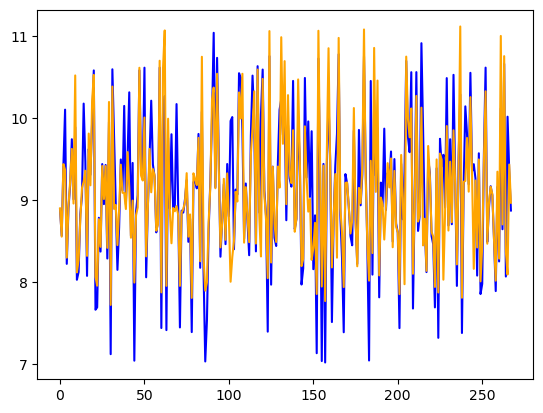

In [110]:
new_df['Actual charges'].plot(color='blue')
new_df['Predicted charges'].plot(color='orange')
plt.show()

Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [109]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred) # unseen data
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))  # manually applied sqrt
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)  # formula of adj R2 shape(no of ind vars)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624696
RMSE: 0.4882327185684707
Adj R-square: 0.703623414730595


In [111]:
print(Y_test.min())
print(Y_test.max())# we can compare range for RMSE()

7.02275569117477
11.044406702204412


In [112]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train,Y_train)

print(rid.intercept_)
print(rid.coef_)

7.000415207061314
[ 0.03498462 -0.07025584  0.01259184  0.09952118  1.5602262  -0.03886915]


In [113]:
Y_pred=rid.predict(X_test)
Y_pred

array([ 8.90383819,  8.559524  ,  9.44432297,  9.37254216,  8.30386562,
        8.93264867,  9.23044255,  9.62008163,  8.96299492, 10.51642592,
        8.12406577,  8.27247141,  8.76226365,  9.15083063,  9.23137113,
        9.36326822,  8.32481017,  9.81730179,  9.18544459, 10.20223939,
       10.52398423,  8.06885693,  7.96149259,  8.77266848,  8.43509829,
        9.42039288,  9.01907481,  9.41962597,  8.42309111, 10.19404856,
        7.7275781 , 10.38171259,  8.89727941,  8.94724544,  8.45682241,
        8.89191125,  9.43834376,  9.09487269,  9.094159  ,  8.896934  ,
        9.59071732,  9.15895566,  8.54636553,  8.9990888 ,  8.00017241,
        8.82120653,  8.91559517, 10.61089538,  9.30527048,  9.24366554,
       10.00310992,  8.31916204,  8.91172601,  9.6293009 ,  9.10136015,
        9.38400733,  9.30671351,  8.63283569,  8.71008752, 10.69579563,
        7.88047073, 10.60941801, 11.06553125,  7.96004765,  9.98958379,
        8.87490557,  8.47930489,  8.90988639,  8.86892784,  8.93

In [114]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred)) 
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)  # formula of adj R2 shape(no of ind vars)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7052731948166417
RMSE: 0.48796809703937566
Adj R-square: 0.7039445991509017


In [115]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train,Y_train)

print(las.intercept_)
print(las.coef_)

7.895875452206857
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [116]:
Y_pred=las.predict(X_test)



from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred)) 
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)  # formula of adj R2 shape(shape-no of ind vars)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [117]:
new_df=pd.DataFrame()
new_df=X_train.copy()


new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

In [83]:
new_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

In [118]:
import statsmodels.formula.api as sm
 

lm_model = sm.ols(formula='charges ~ age + sex + bmi + children + smoker + region', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params) 
print()
print(lm_model.summary())


Intercept    6.998798
age          0.034988
sex         -0.071132
bmi          0.012591
children     0.099630
smoker       1.569344
region      -0.038892
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.4
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:45:22   Log-Likelihood:                -620.60
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

Predict using the model. Evaluate the model.

In [119]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new)) 
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)  # formula of adj R2 shape(shape-no of ind vars)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.70495345176247
RMSE: 0.4882327185684703
Adj R-square: 0.7036234147305953


In [ ]:
ridge is better model for us

Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

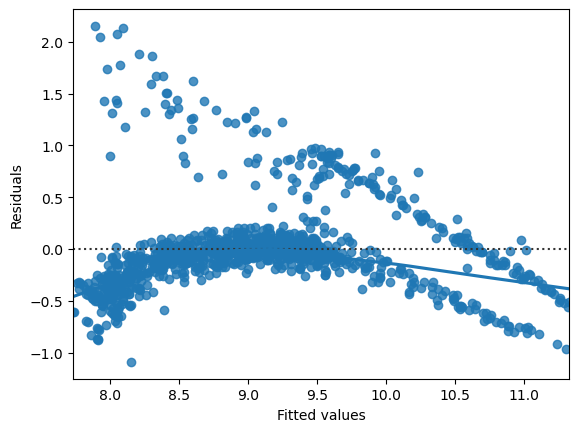

In [120]:
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='charges', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

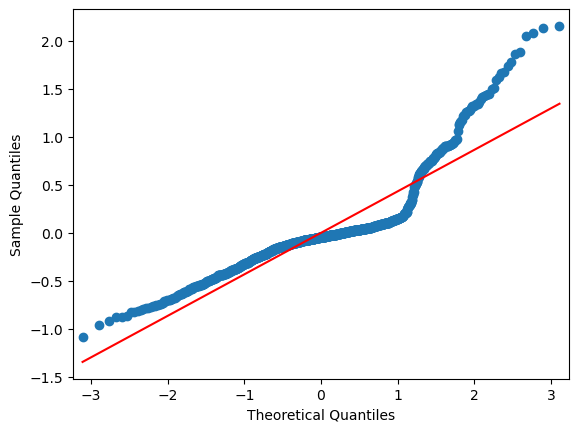

In [121]:
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

In [ ]:
it is skewd errors are positively skewed( original y var was skewed)

Check for Assumption 8-Errors should follow constant variance.<br>
Hint: Diagnostic plot

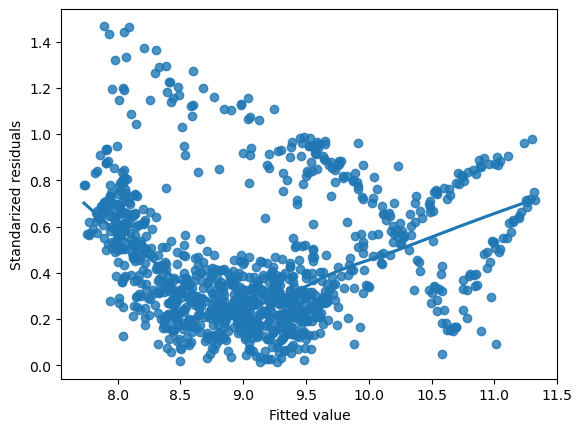

In [122]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

# Project Ends here

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [123]:
sample_data={"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}
X_test_sample=pd.DataFrame(sample_data)

In [125]:
Y_pred=rid.predict(X_test_sample)
Y_pred

array([10.70073159,  8.97304448, 10.26763652,  9.57396116,  8.96299492,
        8.92742692,  9.27508878])

The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [126]:
pred_Y=np.exp(Y_pred)
pred_Y

array([44388.31731204,  7887.57862613, 28785.77219046, 14385.28600088,
        7808.70890381,  7535.85009894, 10668.90567122])